In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

([], [])

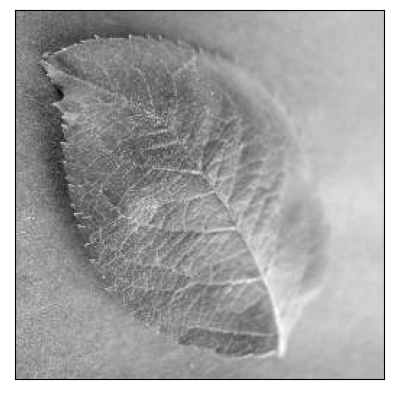

In [2]:
img=cv2.imread(r'D:\Studies\IBM\Project\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\1b36926c-faee-4b6c-9f66-26d1377b9a78___RS_HL 7662.JPG',0)
plt.imshow(img,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [3]:
# Methods for displaying histogram

Text(0, 0.5, 'Frequency')

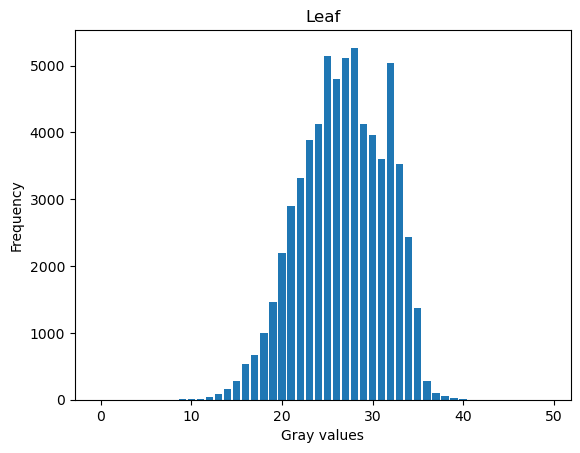

In [4]:
hist=cv2.calcHist([img],[0],None,[50],[0,256])

plt.bar(range(50),hist.ravel())
plt.title('Leaf')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

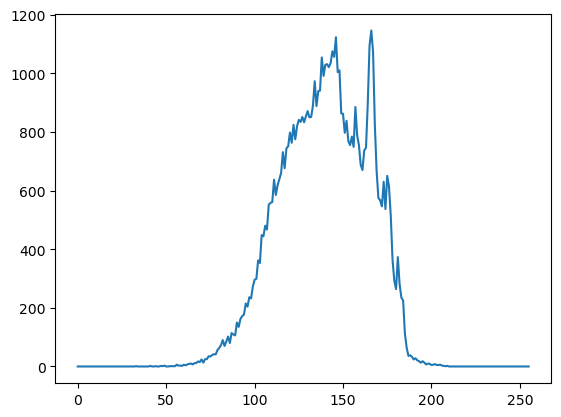

In [5]:
hist,bins=np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [6]:
# Reading two other images
high=cv2.imread(r'D:\Studies\IBM\Project\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\1c85fc77-1843-4a85-8f21-107385d5873c___RS_HL 7272.JPG')
low=cv2.imread(r'D:\Studies\IBM\Project\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\1aa82164-61f2-4baf-b99d-41f18f6e98cc___RS_HL 8087.JPG')

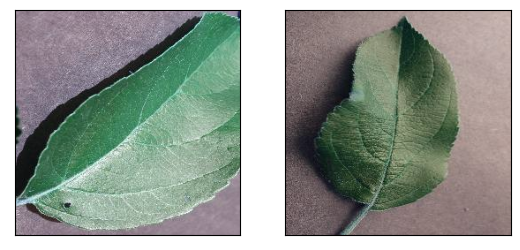

In [7]:
# show images
plt.subplot(121)
plt.imshow(high)
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(low)
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

In [8]:
# Calculating histogram of both images for the last channel.
# Channels can differ from 0 to 2

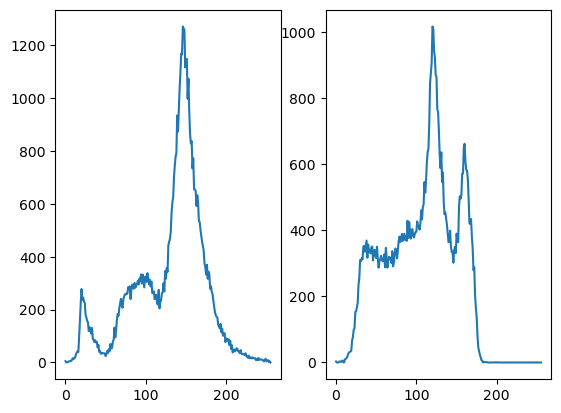

In [9]:
hist_high=cv2.calcHist([high],[2],None,[256],[0,256])
hist_low=cv2.calcHist([low],[2],None,[256],[0,256])

# plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

In [10]:
# plotting cumulative histograms

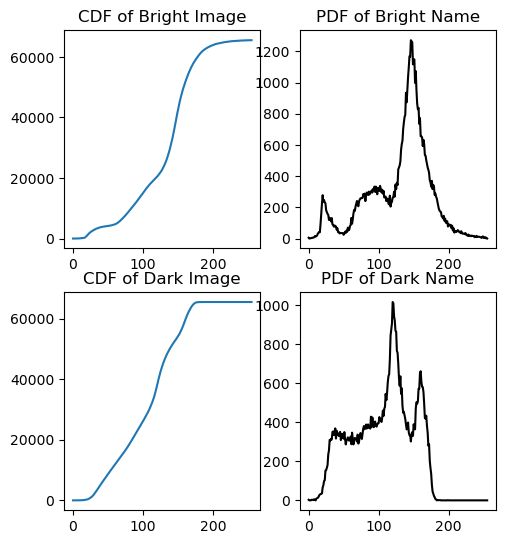

In [11]:
cdf_low=hist_low.cumsum()
cdf_high=hist_high.cumsum()

plt.subplot(221)
plt.plot(cdf_high)
plt.title('CDF of Bright Image')

plt.subplot(222)
plt.plot(hist_high,'k')
plt.title('PDF of Bright Name')

plt.subplot(223)
plt.plot(cdf_low)
plt.title('CDF of Dark Image')

plt.subplot(224)
plt.plot(hist_low,'k')
plt.title('PDF of Dark Name')

# Adjust the placement of subplot
plt.subplots_adjust(bottom=2,right=0.8,top=3)
plt.show()

In [12]:
low_gray=cv2.cvtColor(low,cv2.COLOR_BGR2GRAY)
high_gray=cv2.cvtColor(high,cv2.COLOR_BGR2GRAY)

In [13]:
# Showing images and their histograms

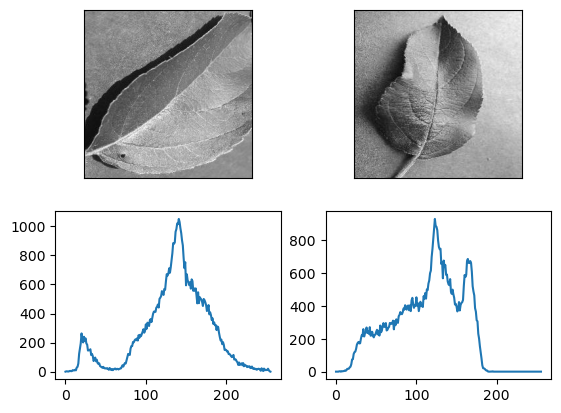

In [14]:
plt.subplot(221)
plt.imshow(high_gray,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222)
plt.imshow(low_gray,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))
plt.show()

In [15]:
# Brightness of Image

In [16]:
def image_manipulate(img,alpha,beta):
    new_img=np.zeros(img.shape,img.dtype)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            new_img[y,x]=np.clip(alpha*img[y,x]+beta,0,255)
    return new_img

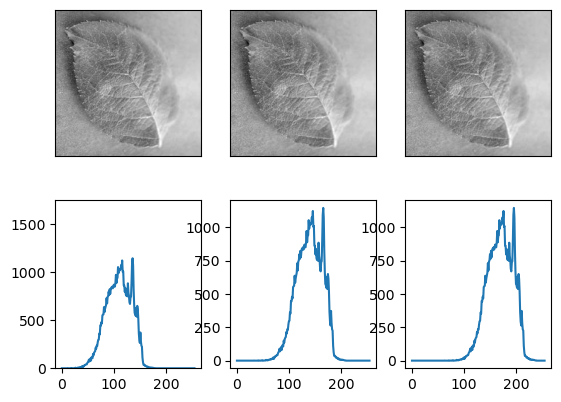

In [17]:
# Image testing
bright=image_manipulate(img,1,30)
dark=image_manipulate(img,1,-30)

plt.figure()
plt.subplot(231)
plt.imshow(dark,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(img,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(bright,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256]))
plt.ylim((0,1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))